In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd /home/mabitbol/GBT-S140/analysis/

/home/mabitbol/GBT-S140/analysis


In [3]:
import foregrounds as fg
from scipy.optimize import curve_fit
import emcee
import corner

In [4]:
from __future__ import unicode_literals

figsize(10,8)

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
    
rcParams['xtick.labelsize'] = 20
rcParams['xtick.major.size'] = 10
rcParams['xtick.major.width'] = 1
rcParams['xtick.major.pad'] = 10
rcParams['xtick.minor.size'] = 5
rcParams['xtick.minor.width'] = 1

rcParams['ytick.labelsize'] = 20
rcParams['ytick.major.size'] = 10
rcParams['ytick.major.width'] = 1
rcParams['ytick.major.pad'] = 10
rcParams['ytick.minor.size'] = 5
rcParams['ytick.minor.width'] = 1

rcParams['legend.fontsize'] = 24
rcParams['legend.borderaxespad'] = 1

rcParams['axes.labelsize'] = 24
rcParams['axes.titlesize'] = 24

In [5]:
freqs = np.array([408e6, 4.575e9, 5.625e9, 6.125e9, 28.5e9, 44.1e9, 70.3e9, 143e9, 217e9, 353e9, 545e9, 857e9])

In [6]:
tflux = np.array([26.8198, 13.388, 13.837, 14.069, 14.573, 13.875, 15.495, 44.376, 191.47, 766.38, 2455., 7653.])
terrs = 0.2 * tflux

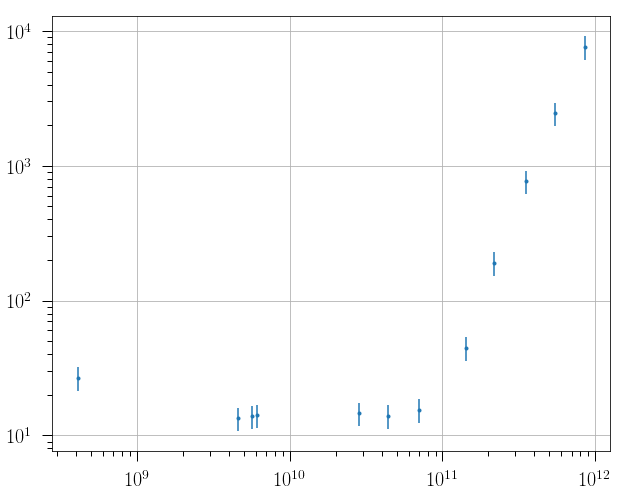

In [7]:
errorbar(freqs, tflux, terrs, fmt='.')
yscale('log')
xscale('log')
grid()

In [8]:
beam = pi*( 0.8 * pi/180.)**2
beam2 = pi*( (0.16/60.) * pi/180.)**2

In [9]:
def signal(freqs, EM, Asd, nup, Ad, Bd, Td, Acmb):
    fffit = fg.freefreep(freqs, EM=EM, Te=8000.)
    dustfit = fg.thermal_dust(freqs, Ad=Ad, Bd=Bd, Td=Td)
    amefit = fg.ame(freqs, Asd=Asd, nup=nup) 
    ccmb = fg.cmb(freqs, A=Acmb)
    return (fffit + dustfit + amefit + ccmb) * beam

In [10]:
def signal2(freqs, EM1, EM2, Ad, Bd, Td, abeam, Acmb):
    fffit = fg.freefreep(freqs, EM=EM1, Te=8000.) * beam
    fffit2 = fg.freefreep(freqs, EM=EM2, Te=8000.) * abeam
    dustfit = fg.thermal_dust(freqs, Ad=Ad, Bd=Bd, Td=Td) * beam
    ccmb = fg.cmb(freqs, A=Acmb) * beam
    return fffit + fffit2 + dustfit + ccmb

In [11]:
def signal3(freqs, EM, Ad, Bd, Td, Acmb):
    fffit = fg.freefreep(freqs, EM=EM, Te=8000.)
    dustfit = fg.thermal_dust(freqs, Ad=Ad, Bd=Bd, Td=Td)
    ccmb = fg.cmb(freqs, A=Acmb)
    return (fffit + dustfit + ccmb) * beam

In [12]:
pn = np.array([1e3, 1e-3, 20e9, 1, 2, 20, 30e-6])
bounds = ( [0, 0, 0, 0, 0, 0, -1], [1e4, 1, 1e11, 1, 3, 40, 1])
x = curve_fit(signal, freqs, tflux, p0=pn, sigma=terrs, absolute_sigma=True, bounds=bounds)
pfit = x[0]

In [13]:
pn2 = np.array([1e3 , 1e7, 0.1, 2, 20, beam2, 30e-6])
bounds2 = ( [0, 1e5, 0, 0, 0, 0, -1.], [1e4, 1e9, 1, 3, 40, 1, 1])
x = curve_fit(signal2, freqs, tflux, p0=pn2, sigma=terrs, absolute_sigma=True, bounds=bounds2)
pfit2 = x[0]

In [14]:
pn3 = np.array([1e3, 1, 2, 20, 30e-6])
bounds3 = ( [0, 0, 0, 0, -1], [1e4, 1, 3, 40, 1])
x = curve_fit(signal3, freqs, tflux, p0=pn3, sigma=terrs, absolute_sigma=True, bounds=bounds3)
pfit3 = x[0]

In [15]:
rchisq1 = np.sum( ( tflux - signal(freqs, *pfit))**2 / terrs**2 ) / (len(freqs) - 7.)
rchisq2 = np.sum( ( tflux - signal2(freqs, *pfit2))**2 / terrs**2 ) / (len(freqs) - 7.)
rchisq3 = np.sum( ( tflux - signal3(freqs, *pfit3))**2 / terrs**2 ) / (len(freqs) - 5.)
print rchisq1, rchisq2, rchisq3

0.697411311286 0.851912529372 0.608717046961


In [16]:
print "EM, Asd, nup, Ad, Bd, Td, Acmb, As, alps"
pfit

EM, Asd, nup, Ad, Bd, Td, Acmb, As, alps


array([  2.65218498e+02,   1.55624978e-04,   3.71073555e+10,
         4.63120942e-04,   1.60323260e+00,   1.71963296e+01,
        -9.68464942e-07])

In [17]:
print "EM1, EM2, Ad, Bd, Td, abeam, Acmb, As, alps"
pfit2

EM1, EM2, Ad, Bd, Td, abeam, Acmb, As, alps


array([  2.72279887e+02,   5.11899606e+06,   4.72615794e-04,
         1.86944025e+00,   1.41645487e+01,   5.33700160e-22,
         2.65194945e-05])

In [18]:
print "EM, Ad, Bd, Td, Acmb, As, alps"
pfit3

EM, Ad, Bd, Td, Acmb, As, alps


array([  2.73110196e+02,   4.72824127e-04,   1.87057046e+00,
         1.41193282e+01,   2.59700510e-05])

In [19]:
def signal_b(freqs, EM, Asd, nup, Ad, Bd, Td, Acmb):
    fffit = fg.freefreep(freqs, EM=EM, Te=8000.)*beam
    dustfit = fg.thermal_dust(freqs, Ad=Ad, Bd=Bd, Td=Td)*beam
    amefit = fg.ame(freqs, Asd=Asd, nup=nup) *beam
    ccmb = fg.cmb(freqs, A=Acmb)*beam
    return fffit, dustfit, amefit, ccmb

In [20]:
def signal2_b(freqs, EM1, EM2, Ad, Bd, Td, abeam, Acmb):
    fffit = fg.freefreep(freqs, EM=EM1, Te=8000.) * beam
    fffit2 = fg.freefreep(freqs, EM=EM2, Te=8000.) * abeam
    dustfit = fg.thermal_dust(freqs, Ad=Ad, Bd=Bd, Td=Td) * beam
    ccmb = fg.cmb(freqs, A=Acmb) * beam
    return fffit, dustfit, fffit2, ccmb

In [21]:
nu = np.linspace(freqs[0], freqs[-1], 1000)

In [22]:
fffit, dustfit, amefit, ccmb = signal_b(nu, *pfit)

In [23]:
fffit2, dustfit2, fffit3, ccmb2 = signal2_b(nu, *pfit2)

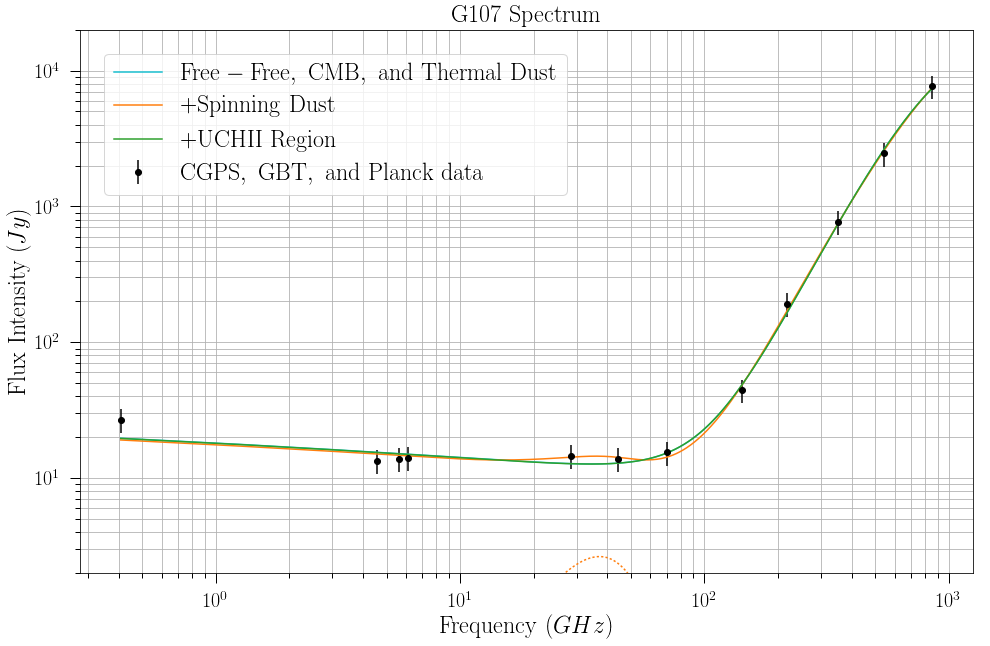

In [25]:
figure(figsize=(16,10))
plot(nu*1e-9, signal3(nu, *pfit3), label='$\mathrm{Free-Free,\ CMB,\ and\ Thermal\ Dust}$', c='C9')
plot(nu*1e-9, signal(nu, *pfit), label='$\mathrm{+Spinning\ Dust}$', c='C1')
plot(nu*1e-9, signal2(nu, *pfit2), label='$\mathrm{+UCHII\ Region}$', c='C2')
errorbar(freqs*1e-9, tflux, yerr=terrs, fmt='ko',label='$\mathrm{CGPS,\ GBT,\ and\ Planck\ data}$')
plot(nu*1e-9, amefit, ls='dotted', c='C1')
#plot(nu*1e-9, fffit)
plot(nu*1e-9, fffit3, ls='dotted', c='C2')
#plot(nu*1e-9, dustfit)
#plot(nu*1e-9, ccmb)

xscale('log')
yscale('log')
xlabel('$\mathrm{Frequency}\ (GHz)$')
ylabel('$\mathrm{Flux\ Intensity}\ (Jy)$')
legend(loc=2, ncol=1)
grid()
ylim(2, 2e4)
grid(which='minor')
title('$\mathrm{G107\ Spectrum}$')
#savefig('../notebooks/wholeregion_smoothed_spectrum_synch')